In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import pandas as pd

To do:
- use wandb api to directly import data

In [59]:
# import results
df_nutr_corr = pd.read_csv(
    "wandb_results/wandb_export_2025-03-02T13_45_23.714-05_00.csv")

df_rewards = pd.read_csv(
    "wandb_results/wandb_export_2025-03-02T14_11_14.382-05_00.csv")

In [60]:
# calculate correlatio coefficient
df_rewards_collapse = df_rewards.iloc[:,1:].melt()
df_nutr_corr_collapse = df_nutr_corr.iloc[:,1:].melt()

corr_coef = np.corrcoef(df_nutr_corr_collapse["value"], df_rewards_collapse["value"])
corr_coef = np.round(corr_coef[0,1], 3)

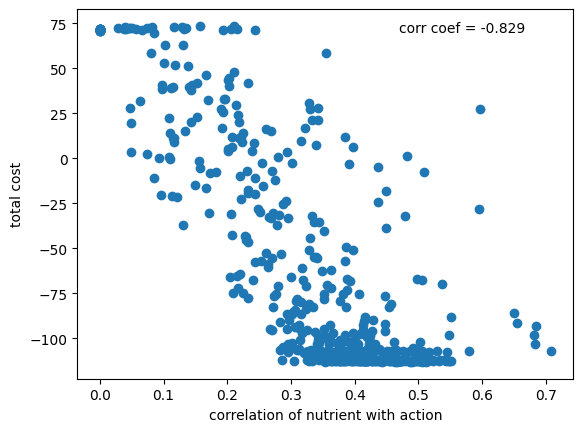

In [62]:
plt.scatter(df_nutr_corr.iloc[:,1:],df_rewards.iloc[:,1:])
plt.xlabel("correlation of nutrient with action")
plt.ylabel("total cost")
plt.annotate("corr coef = "+str(corr_coef), xy=(0.47,70))
plt.show()